In [1]:
import matplotlib.pyplot as plt
import cv2
import yaml
import numpy as np

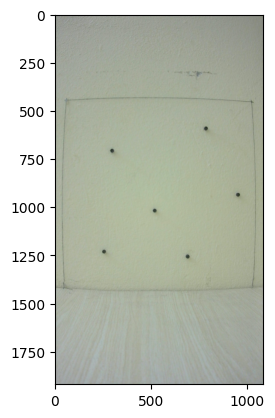

In [12]:
img = plt.imread('plane image/ex1.jpg')
img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

plt.imshow(img)
plt.show()


In [3]:
with open('calibration/calibration.yaml') as f:
    loadeddict = yaml.load(f, Loader=yaml.FullLoader)
mtx = np.array(loadeddict.get('camera_matrix'))
dist = np.array(loadeddict.get('dist_coeff'))

In [16]:
mtx

array([[448.39007599,   0.        , 335.74722143],
       [  0.        , 451.82244918, 295.08194484],
       [  0.        ,   0.        ,   1.        ]])

In [17]:
dist

array([[ 0.02557296, -0.23478513, -0.01145105, -0.00357922,  0.13427761]])

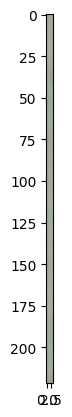

(222, 4, 3)
(1920, 1080, 3)


In [15]:
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
plt.imshow(dst)
plt.show()
print(dst.shape)
print(img.shape)